In [1]:
# 导入专利可视化程序包及相关程序包
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# 设置中文显示字体
plt.rcParams['font.sans-serif'] = ['SimHei']       # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示正负号

# 第一部分 专利态势分析
所谓专利态势分析，即对某一行业或技术领域的专利总体状况进行分析，通常是针对专利数量进行统计分析。基本的专利数量统计分析包括：
* 申请趋势分析
* 技术构成分析
* 地域分布分析
* 申请人排名分析

## 一、申请趋势分析
申请趋势分析常见的分析对象：
* 申请量
* 授权量
* 有效量
* 发明人数量
* 申请人数量
  
申请趋势分析常用图表：
* 折线图
* 面积图
* 柱形图
  
其中，折线图和面积图侧重表示较长时间段内的数量变化趋势，而柱形图侧重表示在短时间段内的数量变化情况，并突出每一个时间段的具体数量值。

### 1. 折线图
#### （1）标准折线图

标准折线图在专利分析中常用来表示某一对象（如国家、地区、申请人、技术领域等）的专利申请量、授权量、有效量、发明人数量、申请人数量等随时间的变化情况

In [2]:
data_211 = pd.read_csv('data/Fig2-1-1.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 1: '申请量'})

In [3]:
data_211.head()

,年份,申请量
0,1964-01-01,1
1,1966-01-01,4
2,1967-01-01,22
3,1969-01-01,17
4,1970-01-01,69


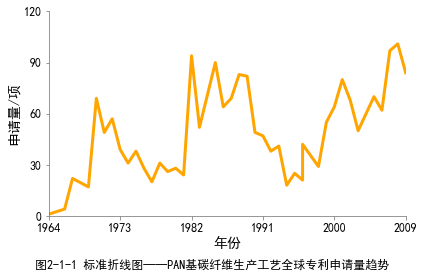

In [4]:
years_ticks = [1964, 1973, 1982, 1991, 2000, 2009]
amount_ticks = [0, 30, 60, 90, 120]

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_211['年份'], data_211['申请量'],
        color='orange', lw=3)

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)
ax.set_xticks([datetime(year,1,1) for year in years_ticks], 
              [str(year) for year in years_ticks])
ax.set_yticks(amount_ticks)
ax.set_xlim([datetime(1964,1,1), datetime(2009,1,1)])
ax.set_ylim([0, 120])
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')
ax.tick_params(color='grey', labelsize=12)

fig.supxlabel('图2-1-1 标准折线图——PAN基碳纤维生产工艺全球专利申请量趋势', fontsize=12, y=0.05);
